# 1. Data Cleaning

1. Date - Changing Aug to August
2. Date - Adding and removing '-' from the format
3. Injured Max - Removing a hyperlink from the column
4. Injured Max - Converting string values to numerals ('40+' to 40, '100+' to 100)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [81]:
# Reading the data
df = pd.read_csv("/Users/harshitsrivastava/Desktop/Data/PakistanSuicideAttacks.csv")

# Dropiing the Columns that are not required
df=df.drop(['Islamic Date', 'Holiday Type', 'Influencing Event/Event', 'Hospital Names'], axis=1)

# Printing the number of missing values in the data
for col in df:
    print col, ": ", df[col].isnull().sum()

S# :  0
Date :  0
Blast Day Type :  11
Time :  211
City :  0
Latitude :  2
Longitude :  2
Province :  0
Location :  3
Location Category :  35
Location Sensitivity :  36
Open/Closed Space :  35
Target Type :  26
Targeted Sect if any :  49
Killed Min :  146
Killed Max :  16
Injured Min :  131
Injured Max :  33
No. of Suicide Blasts :  82
Explosive Weight (max) :  323
Temperature(C) :  5
Temperature(F) :  7


In [82]:
def filling_nan(data):
    
    col = ['Killed Min', 'Injured Min', 'Injured Max']
    
    data['Time'] = data['Time'].fillna('00:00')                      # Filling Time column's missing values with 00:00
    data[col] = data[col].fillna(0)                                  # Filling the above columns with 0
    data['No. of Suicide Blasts'] = data['No. of Suicide Blasts'].fillna(1)
    return data

In [83]:
df = filling_nan(df)

# Printing the number of missing values in the data
for col in df:
    print col, ": ", df[col].isnull().sum()

S# :  0
Date :  0
Blast Day Type :  11
Time :  0
City :  0
Latitude :  2
Longitude :  2
Province :  0
Location :  3
Location Category :  35
Location Sensitivity :  36
Open/Closed Space :  35
Target Type :  26
Targeted Sect if any :  49
Killed Min :  0
Killed Max :  16
Injured Min :  0
Injured Max :  0
No. of Suicide Blasts :  0
Explosive Weight (max) :  323
Temperature(C) :  5
Temperature(F) :  7


### Converting to date format, keeping time as it is

In [84]:
def dt(data):
    for i in range(0, 492):
        
        # Appending the Date and Time field to 'frame' and creating a new column based on the specified Date-time format
        data['Date'][i] =  datetime.strptime(data['Date'][i], '%A-%B %d-%Y')
    
    return data

In [85]:
s_data = dt(df)

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Marking no. of civilians killed and injured

In [86]:
s_data['Killed'] = (s_data['Killed Min'] + s_data['Killed Max'])/2
s_data['Killed'] = np.ceil(s_data['Killed'])
s_data['Injured'] = (s_data['Injured Min'] + s_data['Injured Max'])/2
s_data['Injured'] = np.ceil(s_data['Injured'])

# 2. Grouping by Year, Month and Day of Week

In [87]:
# Extracting Year, Month and Day of week from the given Date-Time format
s_data['Year'] = np.nan
s_data['Weekday'] = np.nan
s_data['Month'] = np.nan

for i in range(0, len(s_data.Year)):
    s_data.loc[:,'Year'][i]= s_data.loc[:,'Date'][i].year
    s_data.loc[:,'Weekday'][i] = s_data['Date'][i].weekday()
    s_data.loc[:,'Month'][i] = s_data['Date'][i].month

# Grouping the new column by the Year, Weekday & Month and corresponding Drone Attacks
s_by_year = s_data.groupby(['Year'])['No. of Suicide Blasts'].sum()
s_by_weekday = s_data.groupby(['Weekday'])['No. of Suicide Blasts'].sum()
s_by_month = s_data.groupby(['Month'])['No. of Suicide Blasts'].sum()

# Plotting the average Civilians killed in an attack
s_by_avgciv = s_data.groupby(['Year'])['Killed'].mean()

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Suicide Bombing Attacks by Year

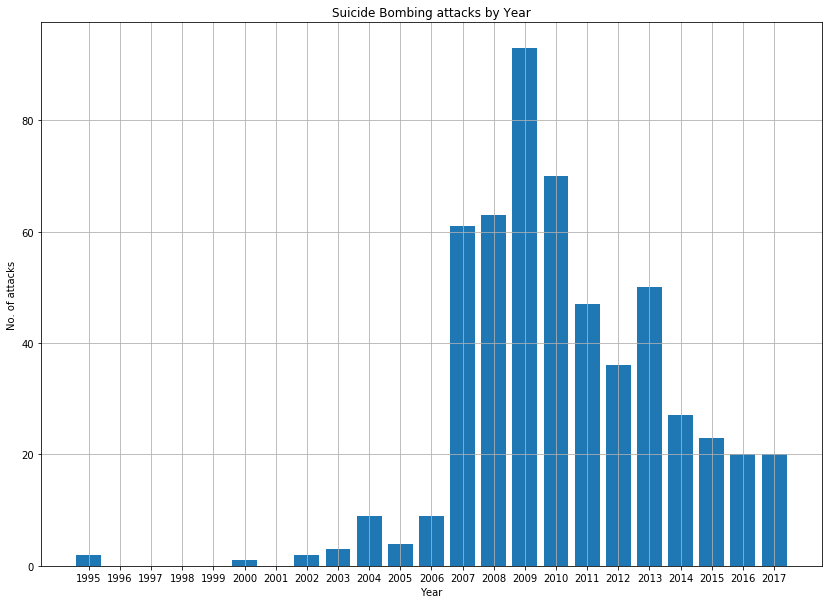

In [88]:
fig1 = plt.figure(figsize=(14, 10))
fig1 = plt.bar(left=list(s_by_year.keys()), height=s_by_year.values)
plt.xlabel("Year")
plt.ylabel("No. of attacks")
plt.title("Suicide Bombing attacks by Year")
plt.xticks(range(1995, 2018))
plt.grid()
plt.show()

In [72]:
s_by_avgciv1 = s_data.groupby(['Year'])['Killed'].mean()

s_by_avgciv1

Year
1995.0    15.000000
2000.0     2.000000
2002.0    10.000000
2003.0    31.500000
2004.0     9.250000
2005.0    17.000000
2006.0    17.111111
2007.0    12.660714
2008.0    13.672414
2009.0    10.636364
2010.0    18.618182
2011.0    13.142857
2012.0     6.774194
2013.0    15.736842
2014.0    10.259259
2015.0     9.952381
2016.0    21.687500
2017.0    15.705882
Name: Killed, dtype: float64

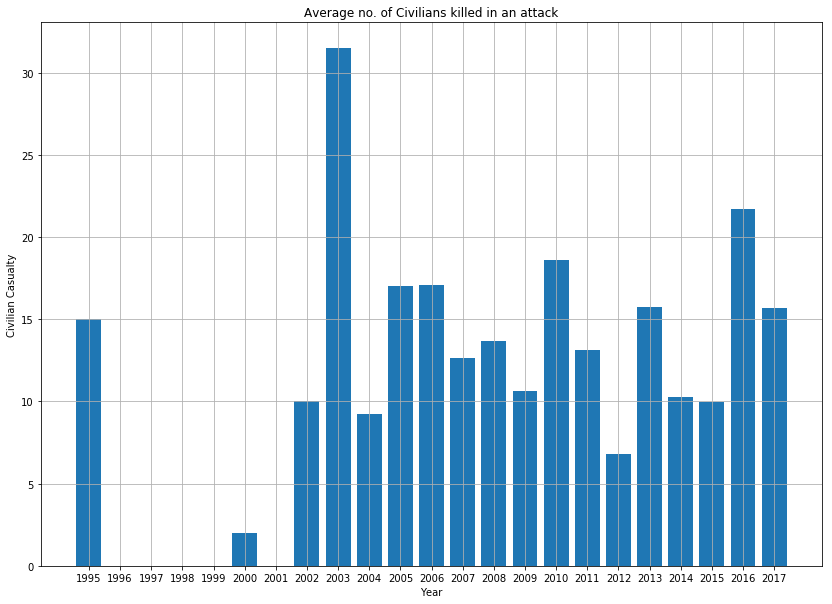

In [89]:
fig1 = plt.figure(figsize=(14, 10))
fig1 = plt.bar(left=list(s_by_avgciv.keys()), height=s_by_avgciv.values)
plt.xlabel("Year")
plt.ylabel("Civilian Casualty")
plt.title("Average no. of Civilians killed in an attack")
plt.xticks(range(1995, 2018))
plt.grid()
plt.show()

### Suicide Bombing Attacks by Day of Week

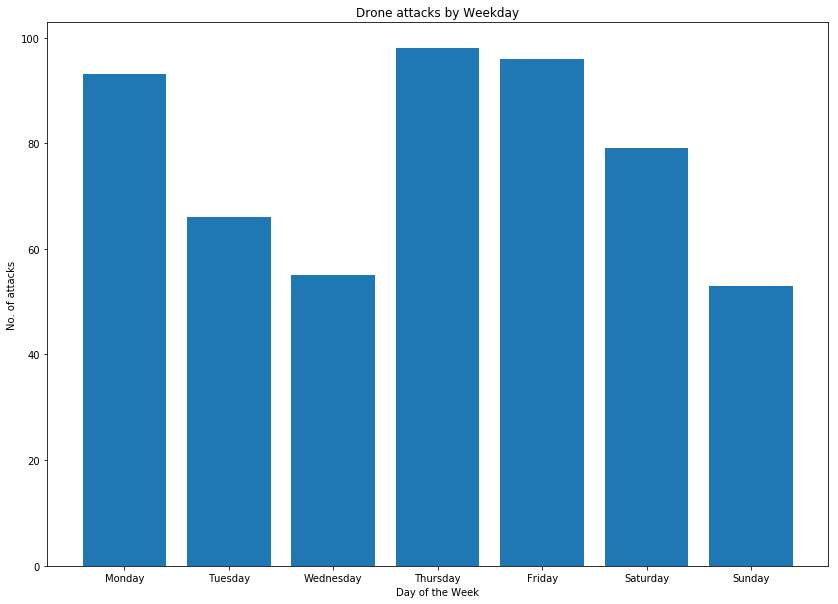

In [90]:
fig2 = plt.figure(figsize=(14, 10))
fig2 = plt.bar(left=list(s_by_weekday.keys()), height=s_by_weekday.values)
plt.xlabel("Day of the Week")
plt.ylabel("No. of attacks")
plt.title("Drone attacks by Weekday")
plt.xticks(range(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

### Suicide Bombing Attacks by Month

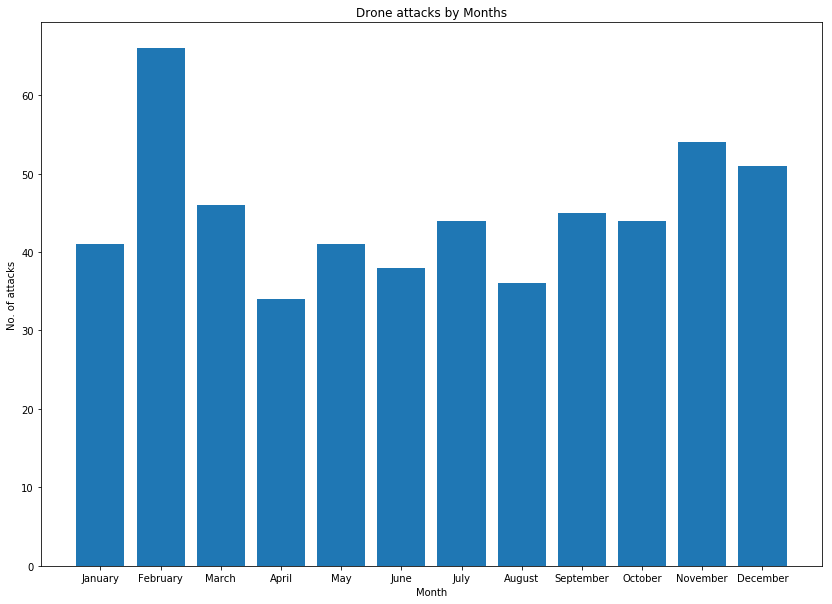

In [91]:
fig3 = plt.figure(figsize=(14, 10))
fig3 = plt.bar(left=list(s_by_month.keys()), height=s_by_month.values)
plt.xlabel("Month")
plt.ylabel("No. of attacks")
plt.title("Drone attacks by Months")
plt.xticks(range(1,13), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
plt.show()

In [92]:
s_data

,S#,Date,Blast Day Type,Time,City,Latitude,Longitude,Province,Location,Location Category,...,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Temperature(C),Temperature(F),Killed,Injured,Year,Weekday,Month
0,1,1995-11-19 00:00:00,Holiday,00:00,Islamabad,33.718000,73.0718,Capital,Egyptian Embassy,Foreign,...,60.0,2.0,NaN,15.835,60.503,15.0,30.0,1995.0,6.0,11.0
1,2,2000-11-06 00:00:00,Working Day,00:00,Karachi,24.991800,66.9911,Sindh,office of Nawa-e-Waqt,Office Building,...,3.0,1.0,NaN,23.770,74.786,2.0,2.0,2000.0,0.0,11.0
2,3,2002-05-08 00:00:00,Working Day,7:45 AM,Karachi,24.991800,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,Hotel,...,40.0,1.0,2.5 Kg,31.460,88.628,14.0,30.0,2002.0,2.0,5.0
3,4,2002-06-14 00:00:00,Working Day,11:10:00 AM,Karachi,24.991800,66.9911,Sindh,US Consulate Civil Lines Area,Foreign,...,51.0,1.0,NaN,31.430,88.574,6.0,26.0,2002.0,4.0,6.0
4,5,2003-07-04 00:00:00,Working Day,00:00,Quetta,30.209500,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,Religious,...,65.0,1.0,NaN,33.120,91.616,46.0,33.0,2003.0,4.0,7.0
5,6,2003-12-25 00:00:00,Holiday,1:40:00 PM/1:42:00 PM,Rawalpindi,33.605800,73.0437,Punjab,Jhanda Chichi area rawalpindi,Mobile,...,50.0,2.0,30kg in each car,9.445,49.001,17.0,25.0,2003.0,3.0,12.0
6,7,2004-02-28 00:00:00,Working Day,00:00,Rawalpindi,33.605800,73.0437,Punjab,Yadgar-i-Hussaini in Satellite Town,Religious,...,4.0,1.0,NaN,15.275,59.495,1.0,4.0,2004.0,5.0,2.0
7,8,2004-05-07 00:00:00,Working Day,1:20:00/1:17:00 PM,Karachi,24.991800,66.9911,Sindh,Karachi Shia mosque Sindh Madrassatul Islam,Religious,...,200.0,1.0,2kg,33.860,92.948,15.0,148.0,2004.0,4.0,5.0
8,9,2004-05-31 00:00:00,Working Day,evening,Karachi,24.991800,66.9911,Sindh,Imambargah off M.A Jinnah road near Numaish in...,Religious,...,35.0,1.0,NaN,31.605,88.889,17.0,18.0,2004.0,0.0,5.0
9,10,2004-06-03 00:00:00,Working Day,00:00,North waziristan,32.974600,70.1456,FATA,checkpost in north waziristan-close to Afghani...,Military,...,2.0,1.0,NaN,27.180,80.924,1.0,1.0,2004.0,3.0,6.0


In [93]:
s_data_byyear = pd.DataFrame()

# Grouping the data by Year and corresponding Suicide Blast Statistics
s_data_byyear['No. of Suicide Blasts'] = s_data.groupby(['Year'])['No. of Suicide Blasts'].sum()
# Storing the average Civilians killed in an attack
s_data_byyear['Avg Civilians Killed'] = s_data.groupby(['Year'])['Killed'].mean()
# Storing the Total Civilians killed 
s_data_byyear['Killed'] = s_data.groupby(['Year'])['Killed'].sum()
# Storing the Total Civilians Injured 
s_data_byyear['Injured'] = s_data.groupby(['Year'])['Injured'].sum()

In [94]:
%store s_data_byyear
%store s_data

Stored 's_data_byyear' (DataFrame)
Stored 's_data' (DataFrame)
